# **Understand the Problem Statement**

## **Objective**: The goal of this project is to analyze hotel booking data to predict booking cancellations and provide actionable insights to improve hotel operations, pricing strategies, and customer satisfaction.



# **Data attributes**
* **hotel:** The type of hotel where the booking was made. Typically, this could be categorized as: City Hotet, Resort Hotel
* **is_canceled:** A binary indicator of whether the booking was canceled.
* **lead_time**: The number of days between the booking date and the actual arrival date. A higher lead time suggests the booking was made well in advance.
* **arrival_date_year:** The year in which the customer is set to arrive at the hotel.
* **arrival_date_month:** The month of arrival, useful for identifying seasonal trends in bookings.
* **arrival_date_week_number:** The week number of the year when the customer is set to arrive. This can help to analyze weekly trends.
* **arrival_date_day_of_month:** The specific day of the month when the customer is set to arrive.
* **stays_in_weekend_nights:** Number of nights the customer will stay during the weekend (Saturday and Sunday). Useful for analyzing weekend vs. weekday stay trends.
* **stays_in_week_nights:** Number of nights the customer will stay during the weekdays (Monday to Friday). Can be compared with weekend stays.
* **adults:** The number of adults in the booking. This could be used for segmenting bookings based on the number of adults.
* **children:** The number of children included in the booking. Missing values in this field could be handled by assuming 0 if not specified.
* **babies:** The number of babies in the booking. Similar to the children column but specifies babies.
* **meal:**The type of meal booked with the stay,
BB: Bed and Breakfast,
HB: Half Board (breakfast and dinner),
FB: Full Board (breakfast, lunch, and dinner),
SC: Self-Catering
* **country:** The country of origin of the customer. This can provide insights into where most of the guests are coming from.
* **market_segment:** The segment the customer belongs to, such as:
Direct: Direct bookings,
Corporate: Corporate bookings,
Online TA: Online Travel Agents
* **distribution_channel:** The channel used for booking, which could include:
Direct,
Corporate,
Online TA,
Travel Agents
* **is_repeated_guest:** Whether the customer is a repeated guest (1) or not (0). Helps to identify loyalty trends.
* **previous_cancellations:** The number of times the customer canceled previous bookings before making this booking.
* **previous_bookings_not_canceled:** The number of previous bookings that were not canceled by the customer.
* **reserved_room_type:** The type of room originally reserved by the customer. Often coded (e.g., A, B, C).
* **assigned_room_type:** The type of room actually assigned to the customer, which might differ from the reserved room.
* **booking_changes:** The number of changes made to the booking by the customer or hotel after the original booking.
deposit_type: The type of deposit required for the booking, such as:
No Deposit,
Non-Refundable,
Refundable
* **agent:** The ID of the travel agency that made the booking. Missing values indicate a direct booking by the customer.
* **company:** The ID of the company that made the booking, applicable for corporate bookings.
* **days_in_waiting_list:** The number of days the booking was on the waiting list before it was confirmed.
* **customer_type:** The type of customer, such as:
1.  Transient: Individual booking not part of a group or contract.
2.  Contract: Booking related to a contract.
3.  Group: Part of a group booking.
* **adr (Average Daily Rate):** The average amount the customer is expected to pay per night during their stay. This is an important metric for pricing analysis.
* **required_car_parking_spaces:** The number of car parking spaces required by the customer.
* **total_of_special_requests:** The number of special requests made by the customer, such as extra towels or a specific room view.
* **reservation_status:** The current status of the booking, which might include:
1.  Canceled: The booking was canceled.
2.  Check-Out: The customer has already checked out.
3.  No-Show: The customer did not arrive for their booking.
* **reservation_status_date:** The date when the booking’s last status was updated.

In [2]:
# import libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [3]:
# load hotel_booking dataset

data = pd.read_csv('/content/drive/MyDrive/Hotel_bookings/hotel_bookings.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# display top 5 rows
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# data information (columnname, total no of values per column, datatype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **EDA (Exploratory Data Analysis)**

In [7]:
# total no.of rows and columns in data
data.shape

(119390, 32)

In [8]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
# Check for missing values

data.isna().sum()[data.isna().sum() > 0]

,0
children,4
country,488
agent,16340
company,112593


In [271]:
# missing data column
missing_columns=data.columns[data.isna().sum() > 0]
display(missing_columns)

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [273]:
for column in missing_columns:
  print(f'{column}={data[column].nunique()}')

children=5
country=177
agent=333
company=352


In [194]:
display(missing_columns)

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [274]:
# including object data types
data.select_dtypes(include=['object']).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [275]:
missing_categorical = {'children', 'country', 'agent', 'company'}.intersection({'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'})
display(missing_categorical)

{'country'}

In [197]:
# excluding objects data types
data.select_dtypes(exclude=['object']).columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [198]:
missing_numeric = {'children', 'country', 'agent', 'company'}.intersection({'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'})
display(missing_numeric)

{'agent', 'children', 'company'}

In [15]:
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['country'].fillna('Not known', inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna('Not known', inplace=True)

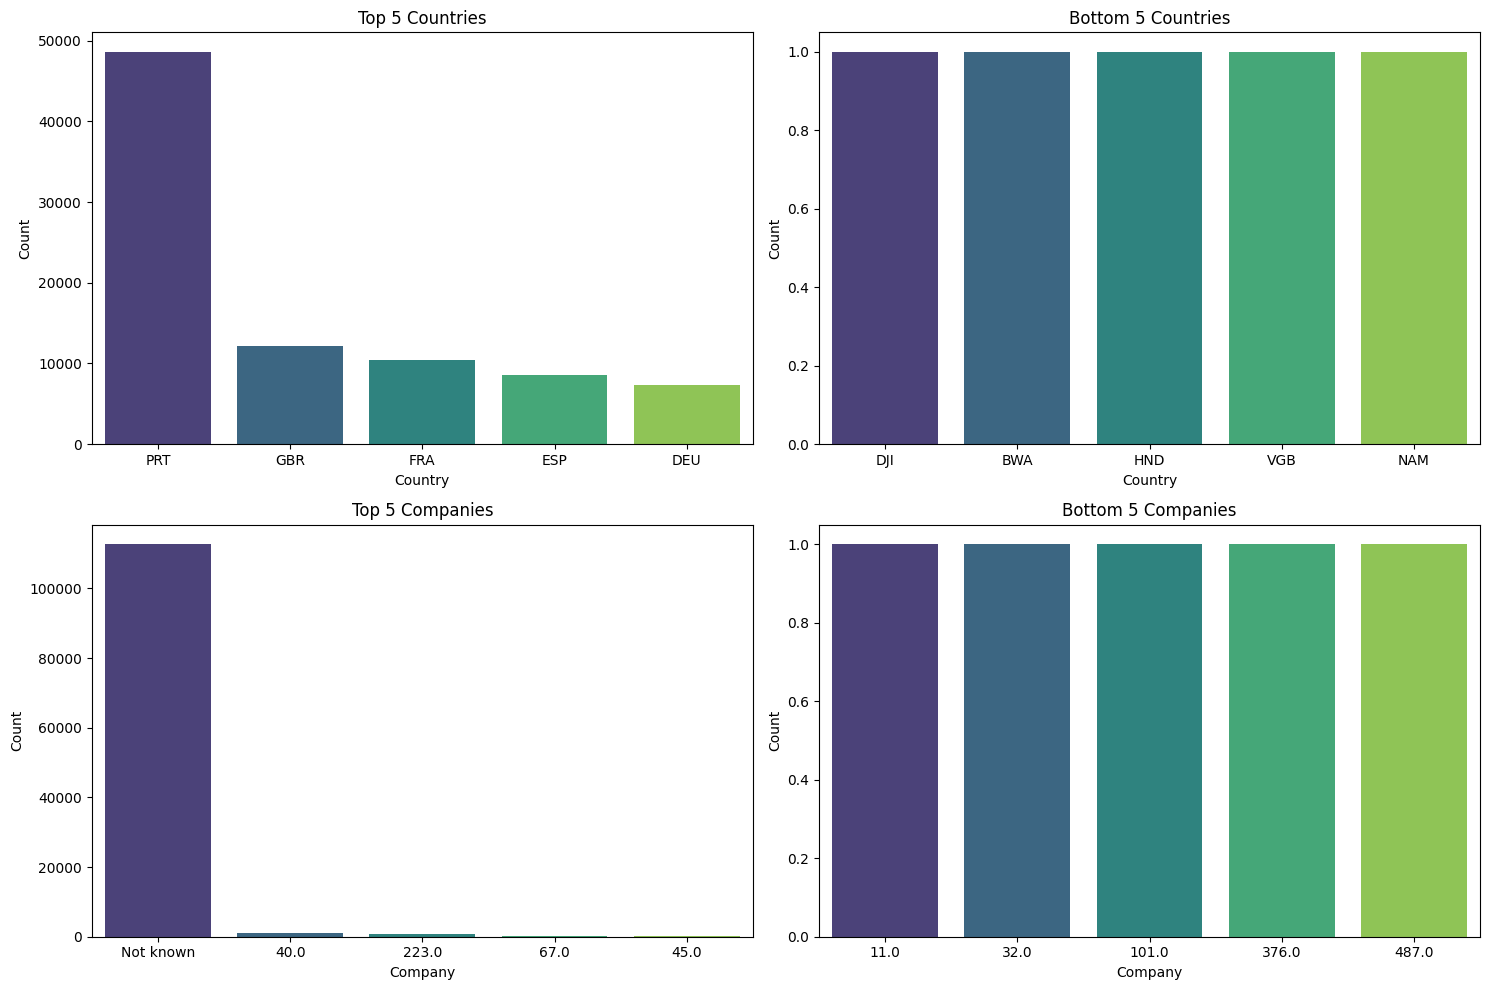

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences for countries and companies
country_counts = data['country'].value_counts()
company_counts = data['company'].value_counts()

# Get top 5 and bottom 5 for countries
top5_countries = country_counts.head(5)
bottom5_countries = country_counts.tail(5)

# Get top 5 and bottom 5 for companies
top5_companies = company_counts.head(5)
bottom5_companies = company_counts.tail(5)

# Plotting
plt.figure(figsize=(15, 10))

# Top 5 Countries
plt.subplot(2, 2, 1)
sns.barplot(x=top5_countries.index, y=top5_countries.values, palette='viridis')
plt.title('Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')

# Bottom 5 Countries
plt.subplot(2, 2, 2)
sns.barplot(x=bottom5_countries.index, y=bottom5_countries.values, palette='viridis')
plt.title('Bottom 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')

# Top 5 Companies
plt.subplot(2, 2, 3)
sns.barplot(x=top5_companies.index, y=top5_companies.values, palette='viridis')
plt.title('Top 5 Companies')
plt.xlabel('Company')
plt.ylabel('Count')

# Bottom 5 Companies
plt.subplot(2, 2, 4)
sns.barplot(x=bottom5_companies.index, y=bottom5_companies.values, palette='viridis')
plt.title('Bottom 5 Companies')
plt.xlabel('Company')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


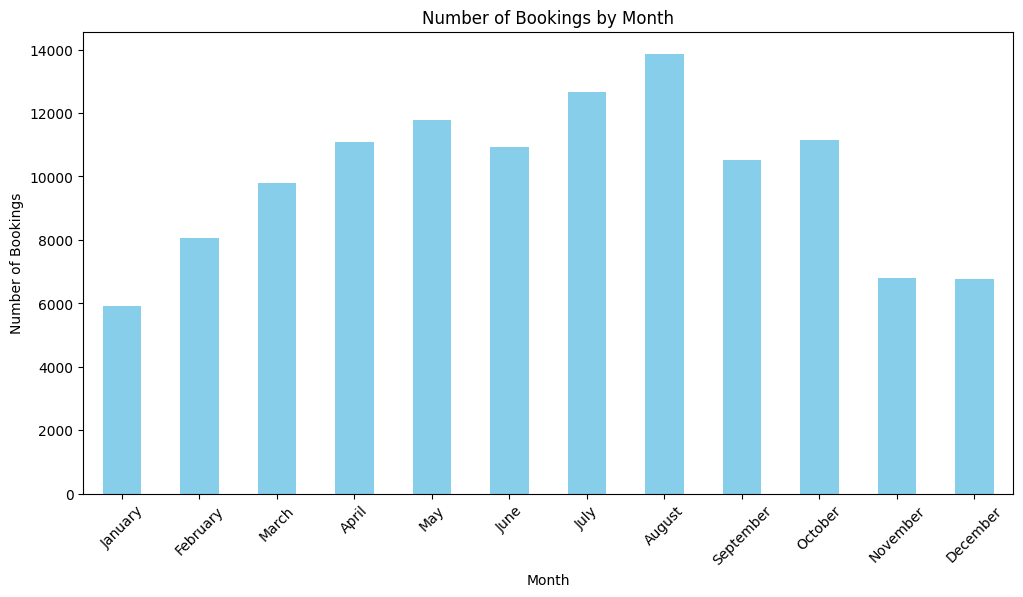

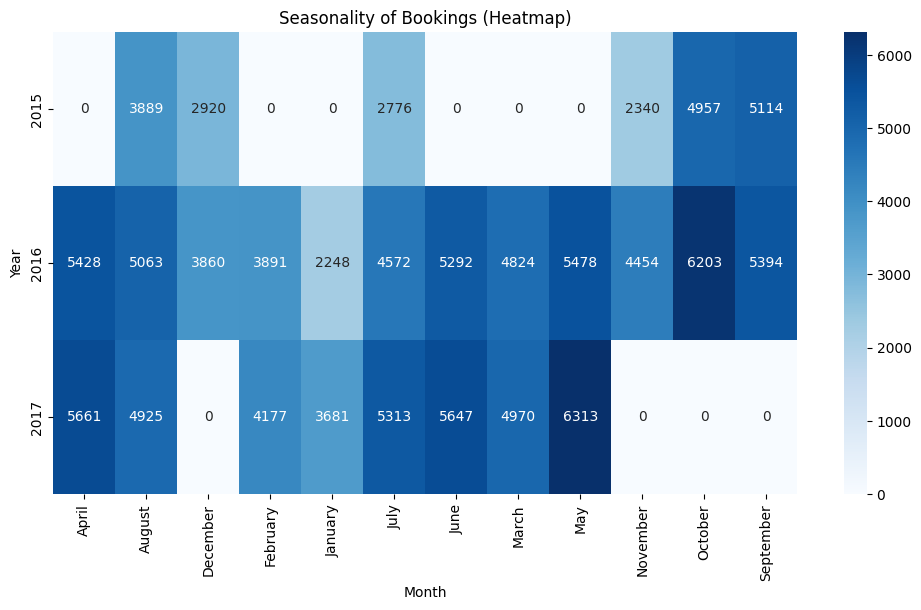

In [204]:
# Group by arrival year and month to see trends
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' +
                                      data['arrival_date_month'] + '-' +
                                      data['arrival_date_day_of_month'].astype(str))

# Plot bookings by month
plt.figure(figsize=(12, 6))
monthly_bookings = data.groupby(['arrival_date_month'])['hotel'].count().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

monthly_bookings.plot(kind='bar', color='skyblue')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Yearly trends
plt.figure(figsize=(12, 6))
yearly_bookings = data.groupby(['arrival_date_year', 'arrival_date_month']).size().unstack().fillna(0)
sns.heatmap(yearly_bookings, cmap='Blues', annot=True, fmt='g')
plt.title('Seasonality of Bookings (Heatmap)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


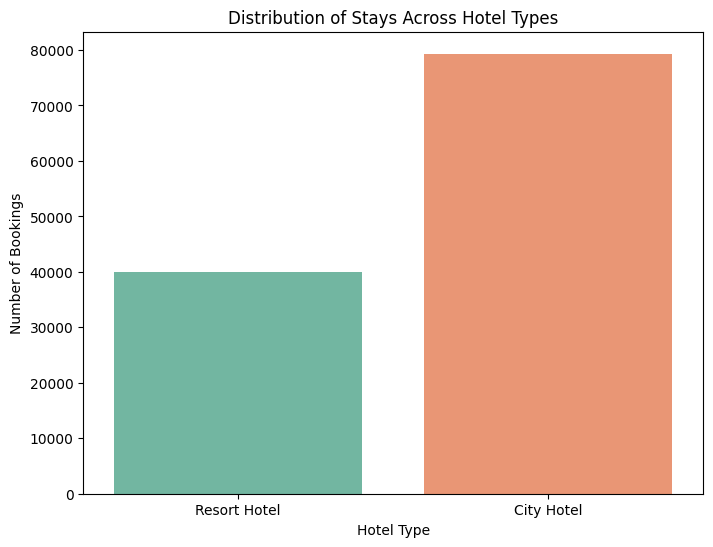

In [205]:
# Plot distribution of bookings across hotel types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='hotel', palette='Set2')
plt.title('Distribution of Stays Across Hotel Types')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()


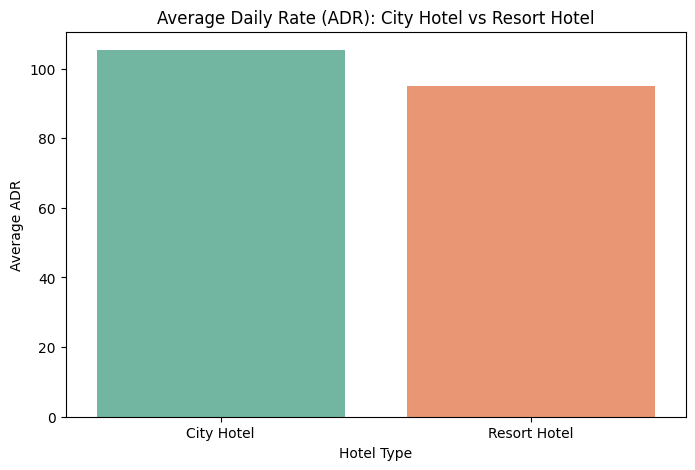

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average ADR for each hotel type
adr_by_hotel = data.groupby('hotel')['adr'].mean().reset_index()

# Plot the average ADR comparison using a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='adr', data=adr_by_hotel, palette='Set2')

# Add title and labels
plt.title('Average Daily Rate (ADR): City Hotel vs Resort Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Average ADR')

# Show the plot
plt.show()


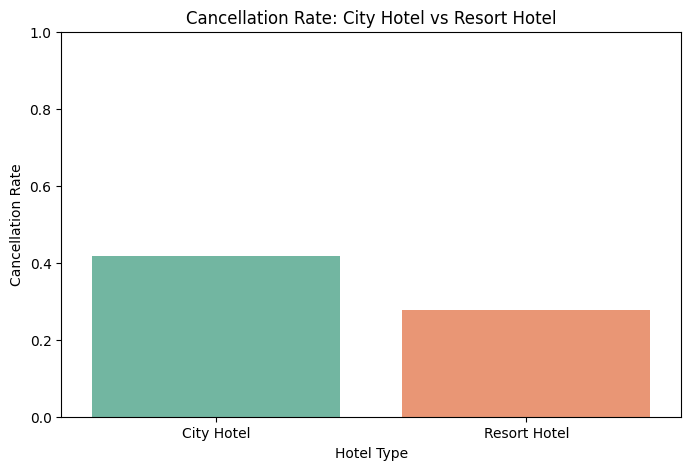

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'hotel' and 'is_canceled' to get the cancellation counts
hotel_cancellation = data.groupby(['hotel', 'is_canceled']).size().unstack()

# Calculate cancellation rate (fraction of canceled bookings)
hotel_cancellation['cancellation_rate'] = hotel_cancellation[1] / (hotel_cancellation[0] + hotel_cancellation[1])

# Reset index to make 'hotel' a column again
hotel_cancellation.reset_index(inplace=True)

# Plot the cancellation rates for City Hotel and Resort Hotel
plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='cancellation_rate', data=hotel_cancellation, palette='Set2')

# Add title and labels
plt.title('Cancellation Rate: City Hotel vs Resort Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1

# Show the plot
plt.show()


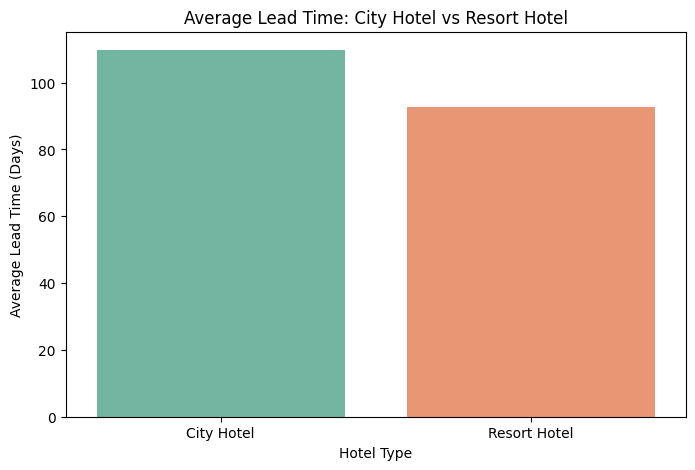

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average lead time for each hotel type
lead_time_by_hotel = data.groupby('hotel')['lead_time'].mean().reset_index()

# Plot the lead time comparison
plt.figure(figsize=(8, 5))
sns.barplot(x='hotel', y='lead_time', data=lead_time_by_hotel, palette='Set2')

# Add title and labels
plt.title('Average Lead Time: City Hotel vs Resort Hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time (Days)')

# Show the plot
plt.show()


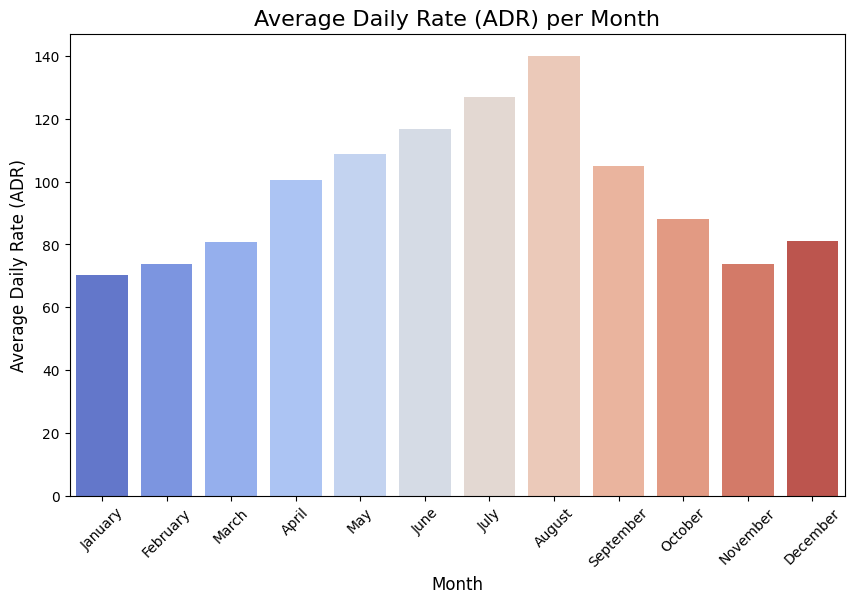

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'arrival_date_month' is ordered by the calendar month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'arrival_date_month' to a categorical type with the proper order
data['arrival_date_month'] = pd.Categorical(data['arrival_date_month'], categories=month_order, ordered=True)

# Group by 'arrival_date_month' and calculate the average ADR
adr_per_month = data.groupby('arrival_date_month')['adr'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=adr_per_month.index, y=adr_per_month.values, palette="coolwarm")
plt.title('Average Daily Rate (ADR) per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


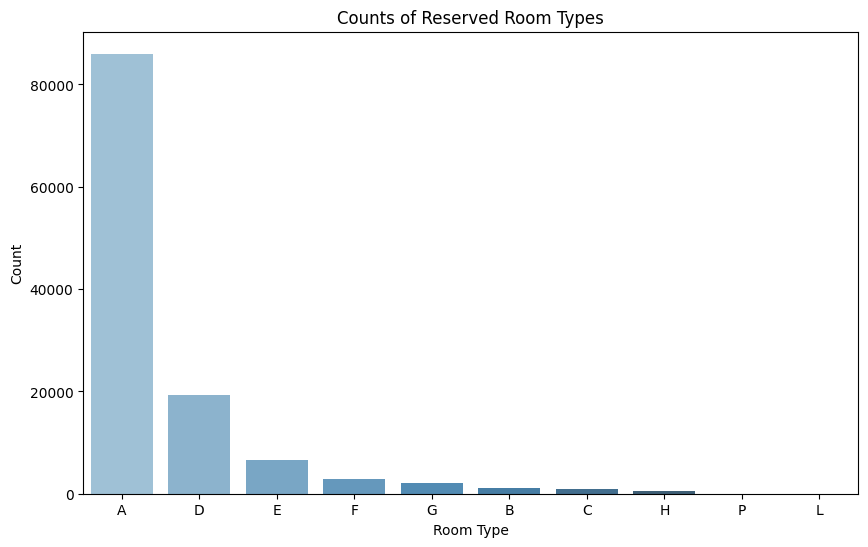

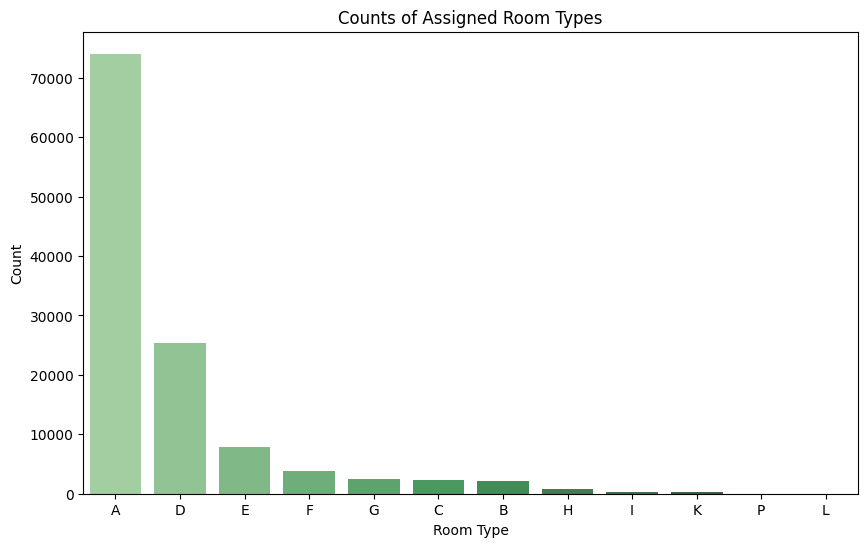

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each reserved and assigned room type
reserved_room_counts = data['reserved_room_type'].value_counts()
assigned_room_counts = data['assigned_room_type'].value_counts()

# Plot Reserved Room Type Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=reserved_room_counts.index, y=reserved_room_counts.values, palette="Blues_d")
plt.title('Counts of Reserved Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

# Plot Assigned Room Type Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=assigned_room_counts.index, y=assigned_room_counts.values, palette="Greens_d")
plt.title('Counts of Assigned Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


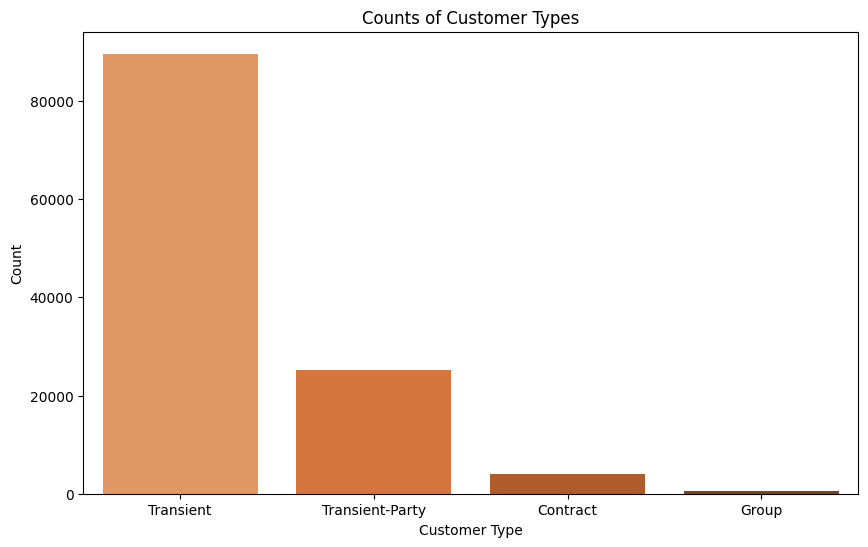

In [294]:
# Count the occurrences of each customer type
customer_type_counts = data['customer_type'].value_counts()

# Plot Customer Type Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette="Oranges_d")
plt.title('Counts of Customer Types')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()


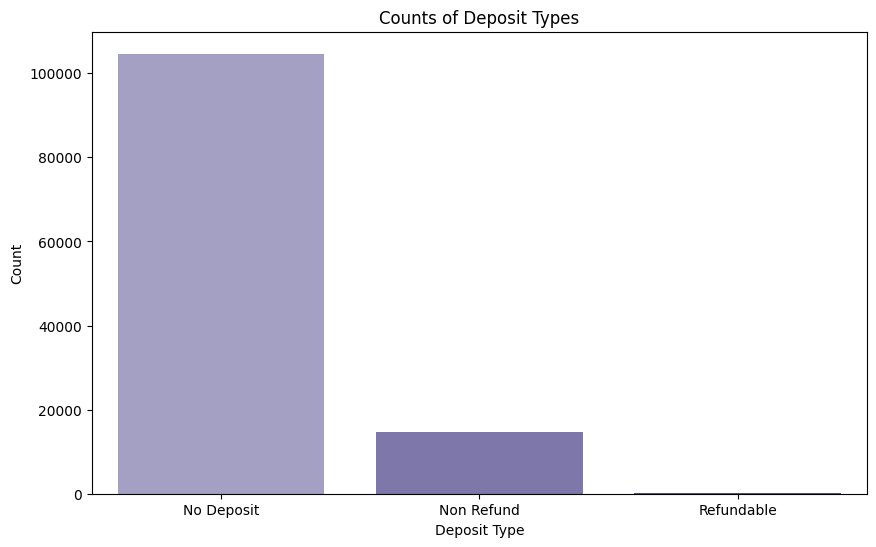

In [295]:
# Count the occurrences of each deposit type
deposit_type_counts = data['deposit_type'].value_counts()

# Plot Deposit Type Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=deposit_type_counts.index, y=deposit_type_counts.values, palette="Purples_d")
plt.title('Counts of Deposit Types')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()


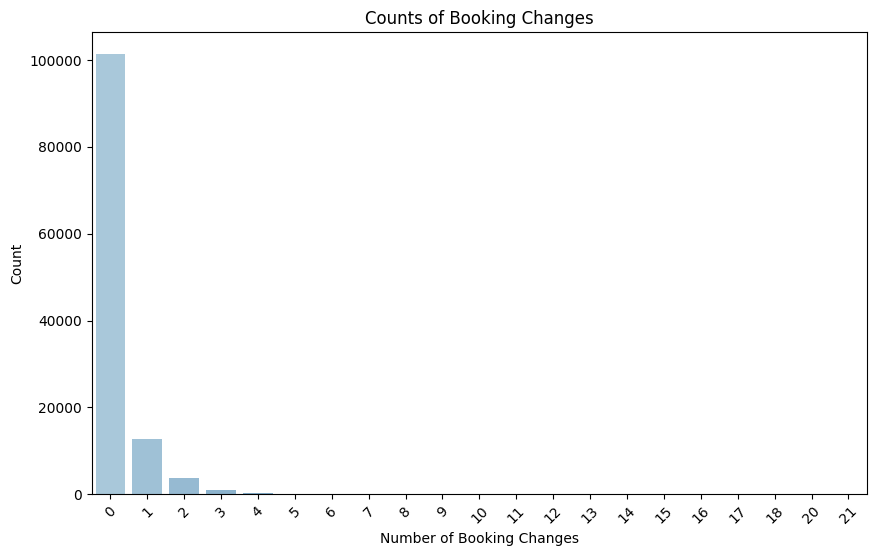

In [296]:
# Count the occurrences of each booking change
booking_changes_counts = data['booking_changes'].value_counts().sort_index()

# Plot Booking Changes Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=booking_changes_counts.index, y=booking_changes_counts.values, palette="Blues_d")
plt.title('Counts of Booking Changes')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


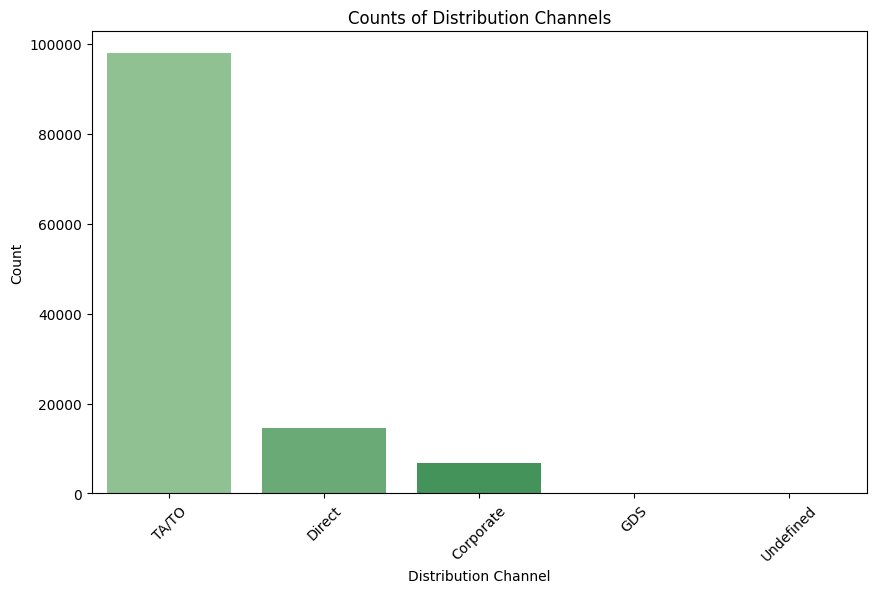

In [297]:
# Count the occurrences of each distribution channel
channel_counts = data['distribution_channel'].value_counts()

# Plot Distribution Channel Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Greens_d")
plt.title('Counts of Distribution Channels')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


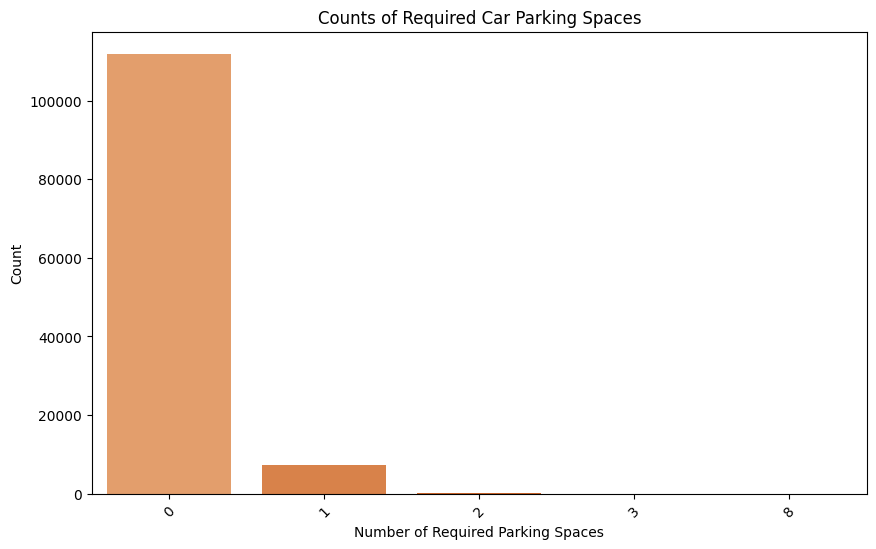

In [301]:
# Count the occurrences of each required car parking space
parking_spaces_counts = data['required_car_parking_spaces'].value_counts().sort_index()

# Plot Required Car Parking Spaces Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=parking_spaces_counts.index, y=parking_spaces_counts.values, palette="Oranges_d")
plt.title('Counts of Required Car Parking Spaces')
plt.xlabel('Number of Required Parking Spaces')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

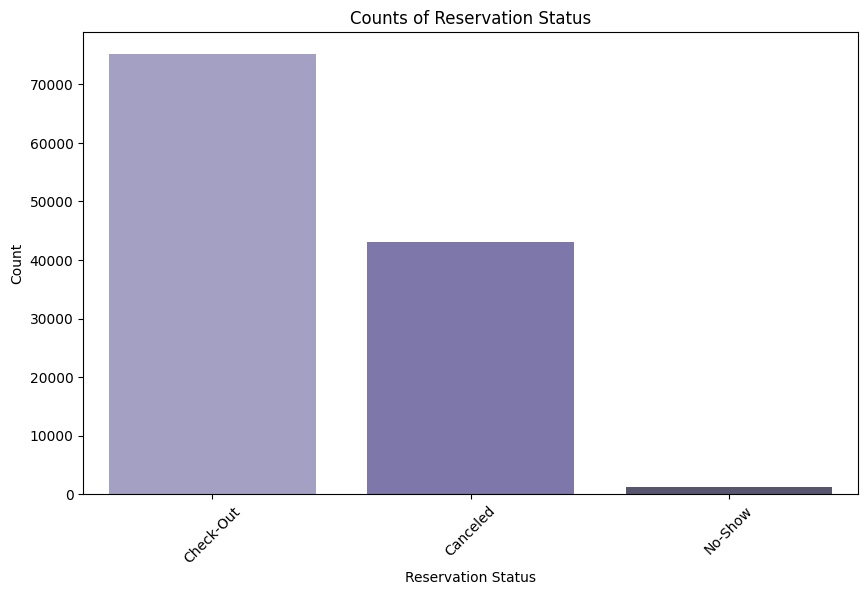

In [302]:
# Count the occurrences of each reservation status
reservation_status_counts = data['reservation_status'].value_counts()

# Plot Reservation Status Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=reservation_status_counts.index, y=reservation_status_counts.values, palette="Purples_d")
plt.title('Counts of Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


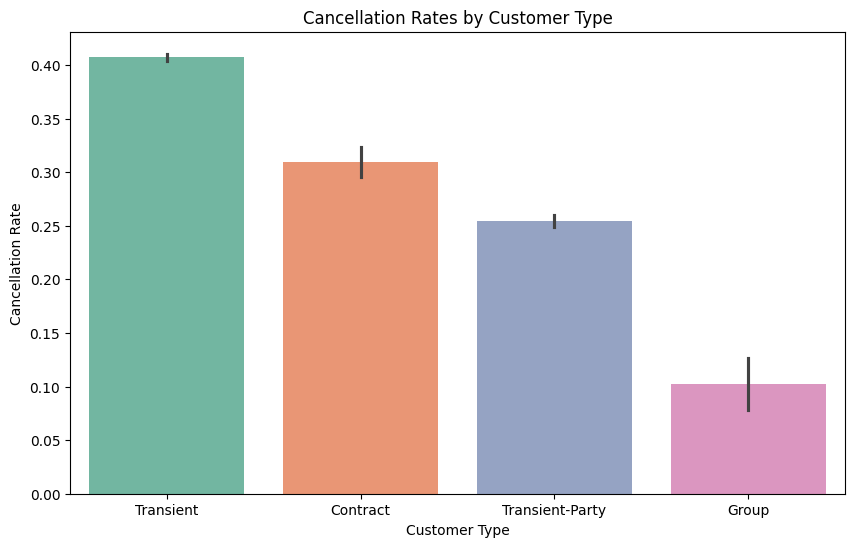

In [299]:
# Cancellation by customer type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='customer_type', y='is_canceled', palette='Set2')
plt.title('Cancellation Rates by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate')
plt.show()


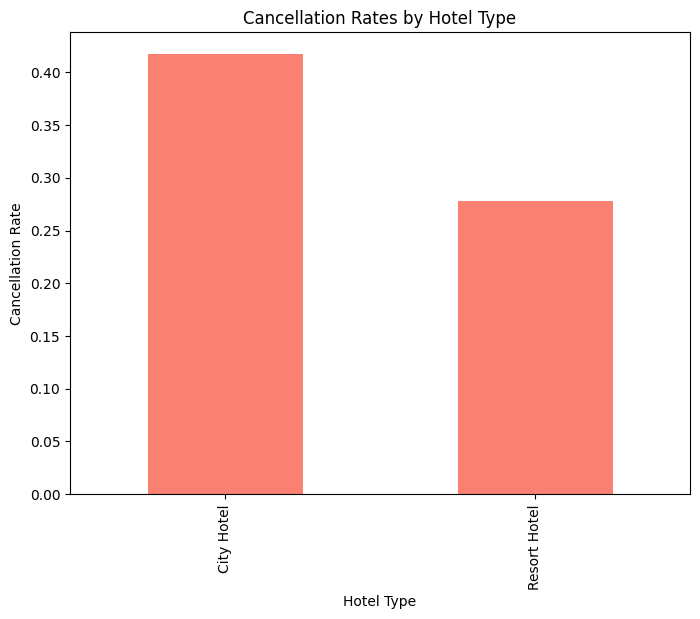

In [300]:
# Cancellation rates by hotel type
plt.figure(figsize=(8, 6))
cancel_rates_by_hotel = data.groupby('hotel')['is_canceled'].mean()
cancel_rates_by_hotel.plot(kind='bar', color='salmon')
plt.title('Cancellation Rates by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

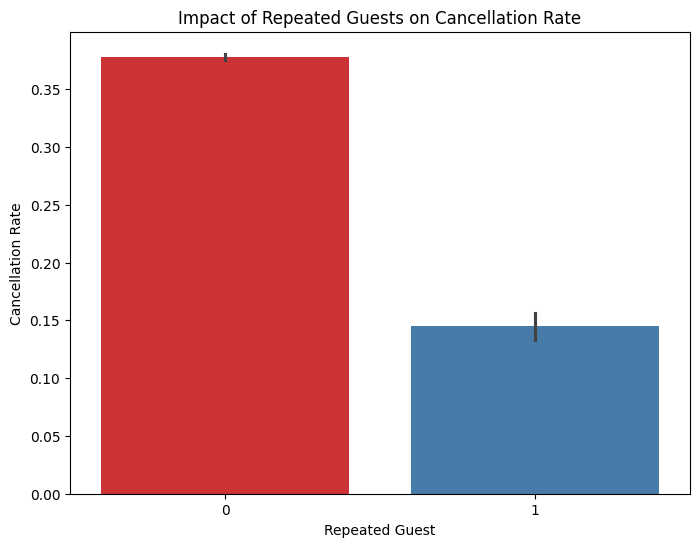

In [312]:
# Impact of repeated guests on cancellation
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='is_repeated_guest', y='is_canceled', palette='Set1')
plt.title('Impact of Repeated Guests on Cancellation Rate')
plt.xlabel('Repeated Guest')
plt.ylabel('Cancellation Rate')
plt.show()

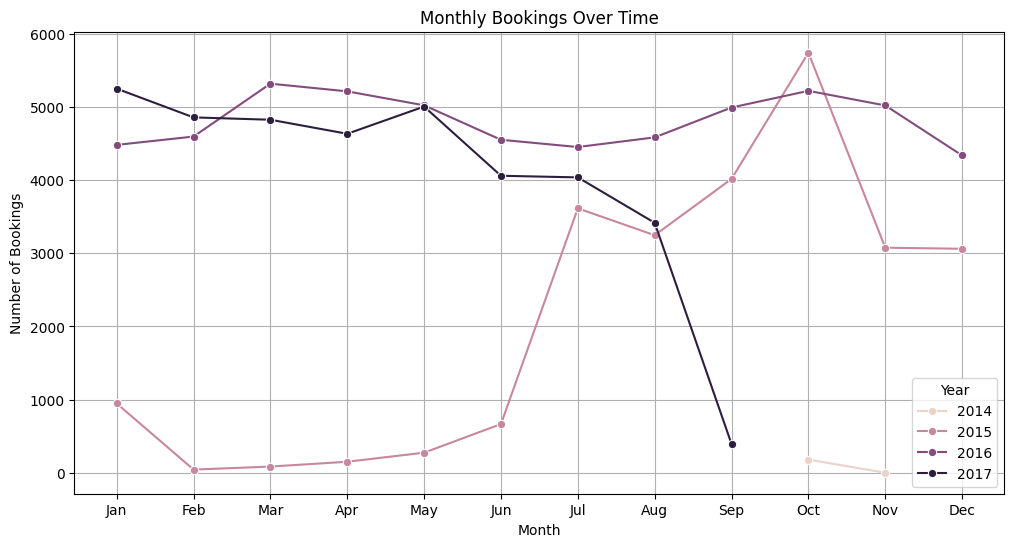

In [303]:
# Convert 'reservation_status_date' to datetime if it's not already
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

# Extract month and year from the reservation date
data['month'] = data['reservation_status_date'].dt.month
data['year'] = data['reservation_status_date'].dt.year

# Group by month and year to count bookings
monthly_bookings = data.groupby(['year', 'month']).size().reset_index(name='count')

# Create a seasonal plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_bookings, x='month', y='count', hue='year', marker='o')
plt.title('Monthly Bookings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid()
plt.show()


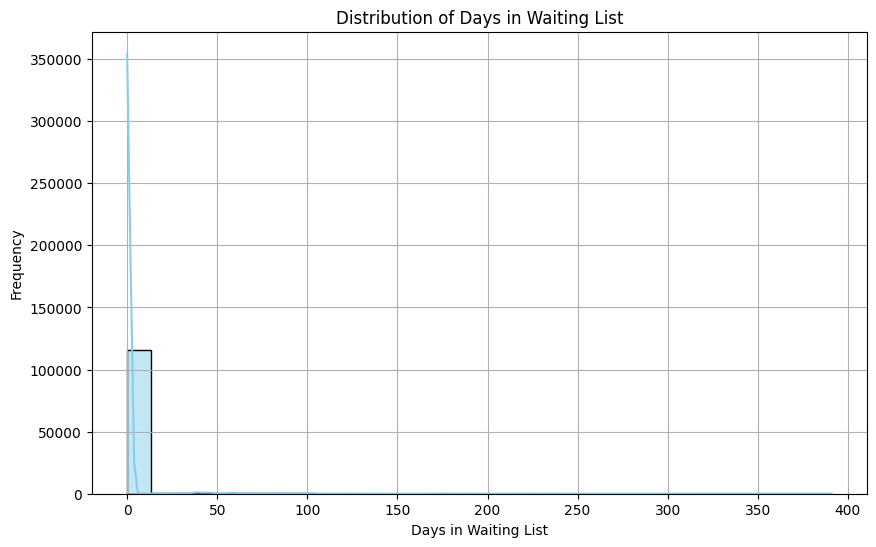

In [305]:
# Plot Histogram of Days in Waiting List
plt.figure(figsize=(10, 6))
sns.histplot(data['days_in_waiting_list'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Days in Waiting List')
plt.xlabel('Days in Waiting List')
plt.ylabel('Frequency')
plt.grid()
plt.show()


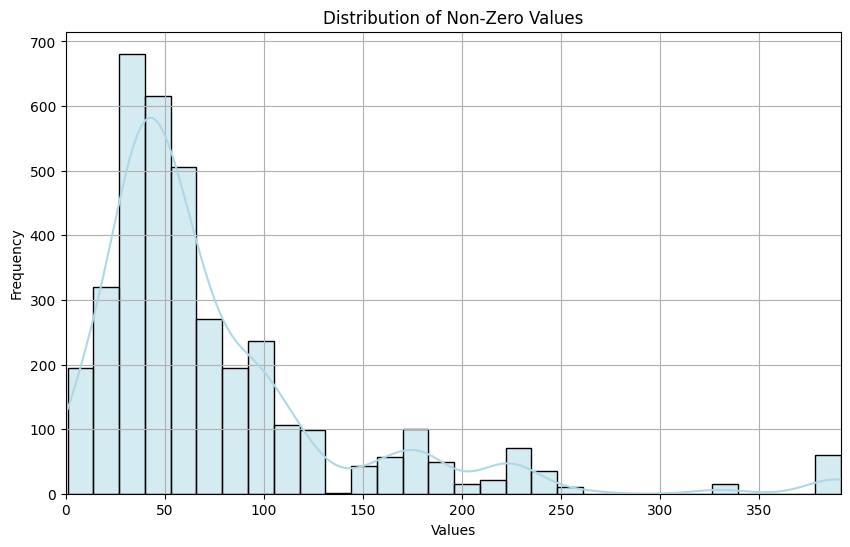

In [308]:
# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data[data['days_in_waiting_list'] > 0]['days_in_waiting_list'], bins=30, kde=True, color='lightblue')
plt.title('Distribution of Non-Zero Values')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Adding an inset for zooming in on the non-zero values
plt.xlim(0, data['days_in_waiting_list'].max())  # Adjust as necessary
plt.grid()
plt.show()


In [309]:
# Assuming 'column_name' is the column you want to analyze
zero_count = (data['days_in_waiting_list'] == 0).sum()
non_zero_count = (data['days_in_waiting_list'] > 0).sum()

# Displaying the counts
print(f'Count of Zero Values: {zero_count}')
print(f'Count of Non-Zero Values: {non_zero_count}')


Count of Zero Values: 115692
Count of Non-Zero Values: 3698


In [311]:
total_count = zero_count + non_zero_count

# Calculate percentages
percentage_zero = (zero_count / total_count) * 100
percentage_non_zero = (non_zero_count / total_count) * 100

# Display the results
print(f'Percentage of Zero Values: {percentage_zero:.2f}%')
print(f'Percentage of Non-Zero Values: {percentage_non_zero:.2f}%')


Percentage of Zero Values: 96.90%
Percentage of Non-Zero Values: 3.10%


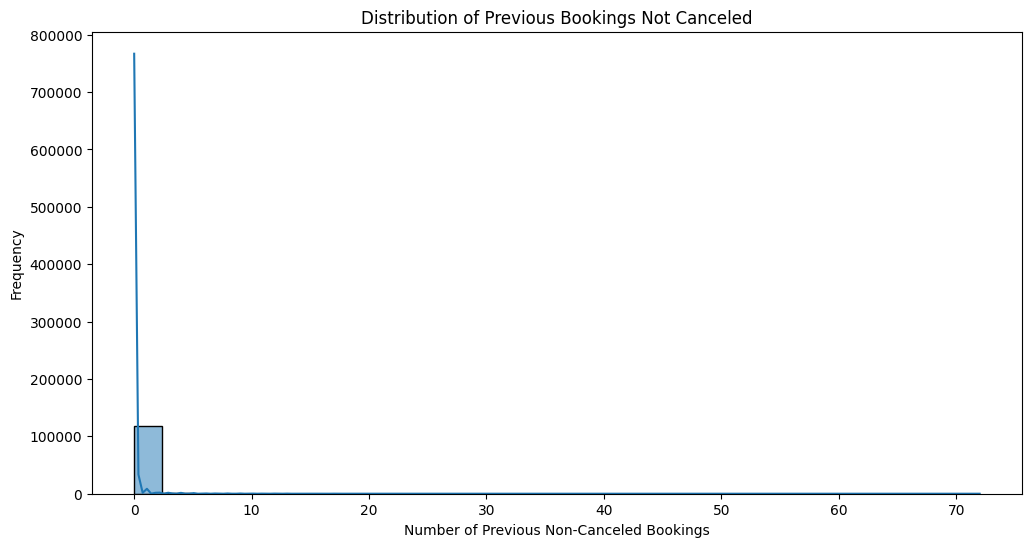

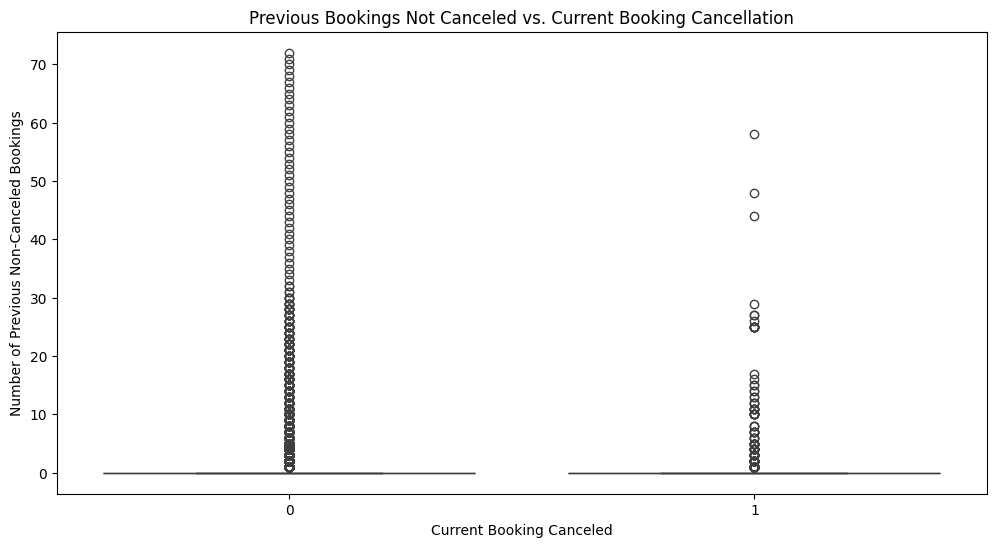

In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of previous bookings not canceled
plt.figure(figsize=(12, 6))
sns.histplot(data['previous_bookings_not_canceled'], bins=30, kde=True)
plt.title('Distribution of Previous Bookings Not Canceled')
plt.xlabel('Number of Previous Non-Canceled Bookings')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between previous bookings not canceled and current booking cancellation
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='previous_bookings_not_canceled', data=data)
plt.title('Previous Bookings Not Canceled vs. Current Booking Cancellation')
plt.xlabel('Current Booking Canceled')
plt.ylabel('Number of Previous Non-Canceled Bookings')
plt.show()


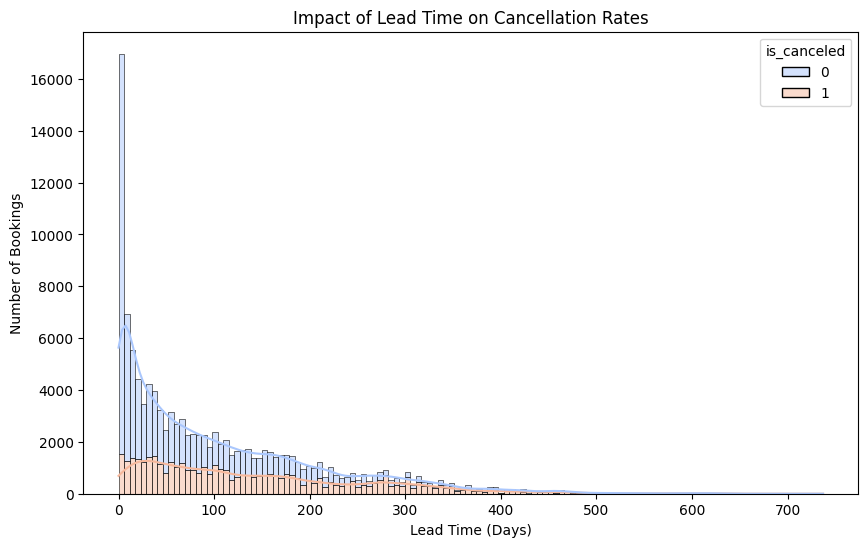

In [214]:
# Lead time impact on cancellation rates
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='lead_time', hue='is_canceled', kde=True, multiple='stack', palette='coolwarm')
plt.title('Impact of Lead Time on Cancellation Rates')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Bookings')
plt.show()


# **Hypothesis Testing**

In [118]:
import scipy.stats as stats

# Create a new column 'long_lead_time' to define bookings with lead time > 180 days
data['long_lead_time'] = data['lead_time'] > 180

# Create a contingency table for the Chi-square test
contingency_table = pd.crosstab(data['long_lead_time'], data['is_canceled'])

# Perform the Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square Test Statistic:", chi2)
print("P-value:", p)

# Check significance
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis. Customers who book more than 6 months in advance are more likely to cancel.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cancellation rates for long and short lead times.")


Chi-square Test Statistic: 5321.73290110073
P-value: 0.0
Reject the null hypothesis. Customers who book more than 6 months in advance are more likely to cancel.


In [119]:
# Create a new column to define weekday or weekend stays
data['weekend_stay'] = data['stays_in_weekend_nights'] > 0

# Separate the data into two groups: weekday and weekend stays
weekday_adr = data[data['weekend_stay'] == False]['adr']
weekend_adr = data[data['weekend_stay'] == True]['adr']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(weekday_adr, weekend_adr, equal_var=False)  # Use Welch's t-test (assumes unequal variances)

print("T-test Statistic:", t_stat)
print("P-value:", p_value)

# Check significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis. Weekday bookings have a significantly higher ADR than weekend bookings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in ADR between weekday and weekend bookings.")


T-test Statistic: -21.696246282662887
P-value: 3.730839516012241e-104
Reject the null hypothesis. Weekday bookings have a significantly higher ADR than weekend bookings.


# **Feature Engineering**

---



In [16]:
# including object data types
categorical_features = data.select_dtypes(include=['object']).columns

In [17]:
for column in categorical_features :
  print(f'{column}={data[column].nunique()}')

hotel=2
arrival_date_month=12
meal=5
country=178
market_segment=8
distribution_channel=5
reserved_room_type=10
assigned_room_type=12
deposit_type=3
company=353
customer_type=4
reservation_status=3
reservation_status_date=926


In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# List of columns to apply Label Encoding
label_cols = ['hotel', 'deposit_type', 'customer_type', 'reservation_status']

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in label_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Reservation status date can remain as a date or be encoded into derived features (e.g., year, month)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_status_year'] = data['reservation_status_date'].dt.year
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_day'] = data['reservation_status_date'].dt.day

# Drop the original 'reservation_status_date' column
data.drop('reservation_status_date', axis=1, inplace=True)

# Check the transformed data
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day
0,1,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,0,0.0,Not known,0,2,0.0,0,0,1,2015,7,1
1,1,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,0,0.0,Not known,0,2,0.0,0,0,1,2015,7,1
2,1,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,0,0.0,Not known,0,2,75.0,0,0,1,2015,7,2
3,1,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,0,304.0,Not known,0,2,75.0,0,0,1,2015,7,2
4,1,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,0,240.0,Not known,0,2,98.0,0,1,1,2015,7,3


In [19]:
# One-Hot Encoding for other categorical variables
one_hot_cols = ['arrival_date_month', 'meal',  'market_segment',
                'distribution_channel', 'reserved_room_type', 'assigned_room_type']

data=pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_year,reservation_status_month,reservation_status_day,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,1,0,342,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,3,0,0.0,Not known,0,2,0.0,0,0,1,2015,7,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,1,0,737,2015,27,1,0,0,2,0.0,0,PRT,0,0,0,4,0,0.0,Not known,0,2,0.0,0,0,1,2015,7,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,1,0,7,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0,0.0,Not known,0,2,75.0,0,0,1,2015,7,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,1,0,13,2015,27,1,0,1,1,0.0,0,GBR,0,0,0,0,0,304.0,Not known,0,2,75.0,0,0,1,2015,7,2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,1,0,14,2015,27,1,0,2,2,0.0,0,GBR,0,0,0,0,0,240.0,Not known,0,2,98.0,0,1,1,2015,7,3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
data.drop(['country','company'],axis=1,inplace=True)


In [22]:
pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.8 MB/s eta 0:00:00


# **Data preparation**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Features and target

X= data.drop('is_canceled',axis=1)
y = data['is_canceled']

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 71 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [34]:
# Calculate cancellation rate before SMOTE
total_bookings_before = data.shape[0]
cancellations_before = data['is_canceled'].sum()
cancellation_rate_before = cancellations_before / total_bookings_before * 100

print(f"Cancellation Rate Before SMOTE: {cancellation_rate_before:.2f}%")


Cancellation Rate Before SMOTE: 37.04%


In [35]:
# check target variable
data['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [36]:
# Handle imbalanced data using SMOTE Technique
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [37]:
# Calculate cancellation rate after SMOTE
total_bookings_after = y_train_res.shape[0]
cancellations_after = y_train_res.sum()
cancellation_rate_after = cancellations_after / total_bookings_after * 100

print(f"Cancellation Rate After SMOTE: {cancellation_rate_after:.2f}%")


Cancellation Rate After SMOTE: 50.00%


Initially, the is_canceled column has a cancellation rate of 37% (indicating that about 37% of bookings were canceled).
After applying the Synthetic Minority Over-sampling Technique (SMOTE), the dataset is balanced to 50% for both canceled and non-canceled bookings.

# **Model Building and Evaluation**

In [240]:
# Build logistic regression model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=42)
Logistic_Regression = LogisticRegression(random_state=42, max_iter=1000)
Logistic_Regression.fit(X_train, y_train)
y_pred = Logistic_Regression.predict(X_val)
y_prob = Logistic_Regression.predict_proba(X_val)[:, 1]

print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.9852
Precision: 0.9995
Recall: 0.9708
F1 Score: 0.9850
AUC: 0.9807


In [242]:
# Training accuracy logistic regression
y_t=Logistic_Regression.predict(X_train)
accuracy_score(y_train, y_t)

0.9833699872390106

In [243]:
# Build Random forest classification model and evaluation with classification metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

Random_Forest = RandomForestClassifier(random_state=42)
# Train the model
Random_Forest.fit(X_train, y_train)

# Make predictions
y_pred = Random_Forest.predict(X_val)
y_prob = Random_Forest.predict_proba(X_val)[:, 1]

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall: {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")

Accuracy: 0.9972
Precision: 1.0000
Recall: 0.9943
F1 Score: 0.9972
AUC: 0.9999


In [244]:
# Training accuracy random forest
y_rt=Random_Forest.predict(X_train)
accuracy_score(y_train, y_rt)

1.0

Model: Logistic Regression
Accuracy: 0.9861
Precision: 0.9988
Recall: 0.9733
F1 Score: 0.9859
AUC: 0.9809
----------------------------------------
Model: Random Forest
Accuracy: 0.9972
Precision: 1.0000
Recall: 0.9943
F1 Score: 0.9972
AUC: 0.9999
----------------------------------------


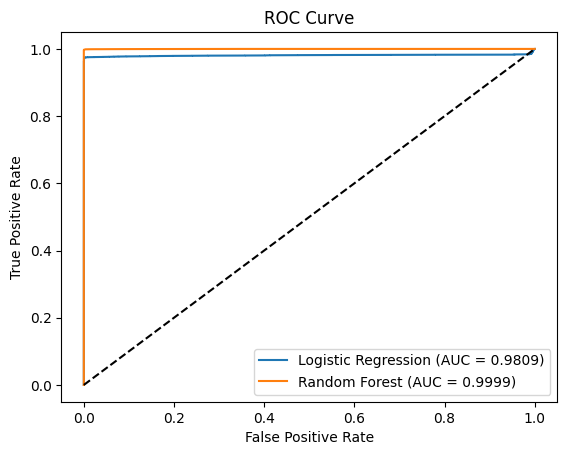

In [257]:
# check the overall models accuarcy and performance

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Train-Test Split (assuming X_train_res and y_train_res are your resampled datasets)
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.25, random_state=42)

# Model Training
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
}

# Fit models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print(f"Precision: {precision_score(y_val, y_pred):.4f}")
    print(f"Recall: {recall_score(y_val, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_val, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_val, y_prob):.4f}")
    print("-" * 40)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_val, y_prob):.4f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



# **Confusion matrix and Feature importance**



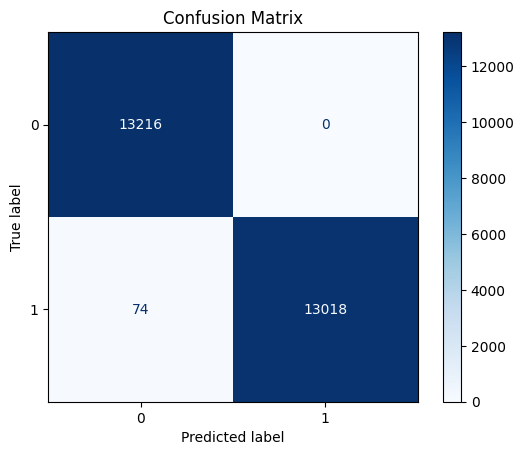

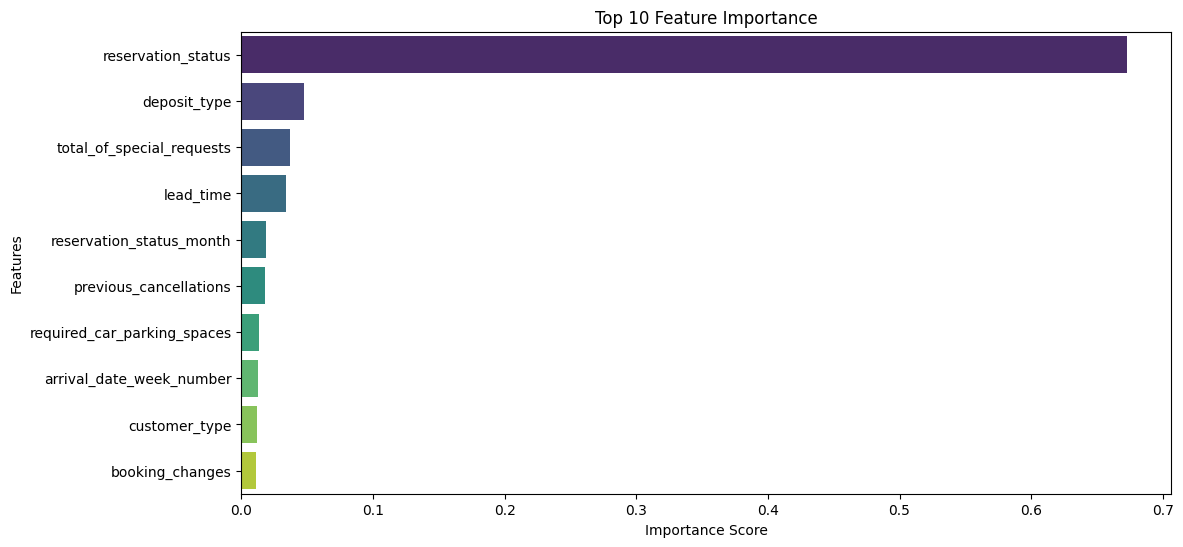

Top 5 Features :
1. reservation_status - Importance: 0.6729
2. deposit_type - Importance: 0.0474
3. total_of_special_requests - Importance: 0.0366
4. lead_time - Importance: 0.0341
5. reservation_status_month - Importance: 0.0187


In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming the best model after evaluation is 'best_rf' (Random Forest) from previous code

# Confusion Matrix for Best Model
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Feature Importance for Random Forest
feature_importances = model.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Get the top 10 features
top_n = 10
top_indices = indices[:top_n]

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[top_indices], y=features[top_indices], palette='viridis')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



# Print the top 5 most important features
top_5_features = features[indices][:5]
print("Top 5 Features :")
for i, feature in enumerate(top_5_features, start=1):
    print(f"{i}. {feature} - Importance: {feature_importances[indices][i-1]:.4f}")




1.   The reservation status significantly impacts the likelihood of cancellations, suggesting that certain statuses are associated with higher cancellation rates.
2.   The type of deposit made by the customer also plays a role in cancellation decisions, indicating that refundable and non-refundable deposits may influence customer behavior.
3. The number of special requests made by guests correlates with cancellation likelihood, potentially reflecting guest satisfaction or specific needs.
4. Longer lead times may affect cancellation rates, with earlier bookings potentially being more prone to changes or cancellations.
5. The month in which a reservation is made has a slight impact on cancellation behavior, possibly reflecting seasonal trends in booking and cancellations.




# **K-fold cross validation**

In [254]:
# k-fold cross_validation Random Forest

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Initialize lists to store evaluation metrics
accuracy_scores_rf = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []

# Loop through the K-Folds
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_scores_rf.append(accuracy_score(y_test, y_pred))
    precision_scores_rf.append(precision_score(y_test, y_pred))
    recall_scores_rf.append(recall_score(y_test, y_pred))
    f1_scores_rf.append(f1_score(y_test, y_pred))

# Calculate the average of each metric across all folds
print("Average Accuracy: ", sum(accuracy_scores_rf) / len(accuracy_scores_rf))
print("Average Precision: ", sum(precision_scores_rf) / len(precision_scores_rf))
print("Average Recall: ", sum(recall_scores_rf) / len(recall_scores_rf))
print("Average F1 Score: ", sum(f1_scores_rf) / len(f1_scores_rf))


Average Accuracy:  0.999321551218695
Average Precision:  1.0
Average Recall:  0.9981686314128337
Average F1 Score:  0.999083298681277


The Random Forest model demonstrates exceptional performance across all folds, achieving an average accuracy of 99.93%. The perfect precision of 1.0 indicates that every positive prediction (cancellations) is accurate, and the high recall of 99.82% suggests that nearly all actual cancellations are identified correctly. The average F1 Score of 99.91% reflects an excellent balance between precision and recall, confirming the model's robustness in predicting cancellations.

In [255]:
# k-fold cross_validation Logistic Regression

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Initialize the K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through the K-Folds
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate the average of each metric across all folds
print("Average Accuracy: ", sum(accuracy_scores) / len(accuracy_scores))
print("Average Precision: ", sum(precision_scores) / len(precision_scores))
print("Average Recall: ", sum(recall_scores) / len(recall_scores))
print("Average F1 Score: ", sum(f1_scores) / len(f1_scores))


Average Accuracy:  0.9884412429851747
Average Precision:  0.9985126560637896
Average Recall:  0.9702198444547518
Average F1 Score:  0.9841589380398428


The Logistic Regression model exhibits strong performance with an average accuracy of 98.84%. The precision of 99.85% indicates that the model makes very few false positive predictions regarding cancellations. However, the recall of 97.02% suggests that it misses a small portion of actual cancellations. The average F1 Score of 98.42% shows a good balance, but it falls slightly short compared to the Random Forest model.

# **Thank you !**